# 깊은 다층 퍼셉트론으로 MNIST 손글씨 인식
- 데이터 전처리, 모델 정의, 학습, 평가, 시각화 진행

## 라이브러리 불러오기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
ds.mnist

<module 'keras.datasets.mnist' from 'c:\\anaconda\\envs\\cv\\Lib\\site-packages\\keras\\datasets\\mnist\\__init__.py'>

## 데이터 전처리

- MNIST 데이터셋 불러오기 및 전처리
- 데이터는 28x28 흑백 이미지를 1차원 벡터(784차원)로 변환
- 픽셀 값을 [0, 1] 범위로 정규화
- 레이블을 원-핫 인코딩으로 변환

In [3]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

# 데이터 정규화 및 1차원 벡터로 변환
x_train = x_train.reshape(60000, 784).astype(np.float32) / 255.0
x_test = x_test.reshape(10000, 784).astype(np.float32) / 255.0

# 레이블을 원-핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
dmlp = Sequential()
dmlp.add(Input(shape=(784,)))
dmlp.add(Dense(units=1024, activation='relu'))
dmlp.add(Dropout(0.4))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dropout(0.4))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dropout(0.4))
dmlp.add(Dense(units=10, activation='softmax'))

## 모델 컴파일 및 학습

- 손실 함수: categorical_crossentropy (다중 클래스 분류)
- 옵티마이저: Adam
- 평가 지표: accuracy
- 배치 크기 : 128, 에포크 : 50 으로 학습 진행

In [5]:
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

Epoch 1/30
469/469 - 11s - 24ms/step - accuracy: 0.8407 - loss: 0.6048 - val_accuracy: 0.9342 - val_loss: 0.2820
Epoch 2/30
469/469 - 8s - 18ms/step - accuracy: 0.8635 - loss: 0.5761 - val_accuracy: 0.9381 - val_loss: 0.2521
Epoch 3/30
469/469 - 8s - 18ms/step - accuracy: 0.8686 - loss: 0.5669 - val_accuracy: 0.9400 - val_loss: 0.2950
Epoch 4/30
469/469 - 9s - 18ms/step - accuracy: 0.8649 - loss: 0.5975 - val_accuracy: 0.9272 - val_loss: 0.3121
Epoch 5/30
469/469 - 8s - 18ms/step - accuracy: 0.8626 - loss: 0.6153 - val_accuracy: 0.9320 - val_loss: 0.3722
Epoch 6/30
469/469 - 8s - 18ms/step - accuracy: 0.8612 - loss: 0.6129 - val_accuracy: 0.9318 - val_loss: 0.3355
Epoch 7/30
469/469 - 8s - 18ms/step - accuracy: 0.8706 - loss: 0.5629 - val_accuracy: 0.9333 - val_loss: 0.3062
Epoch 8/30
469/469 - 8s - 18ms/step - accuracy: 0.8692 - loss: 0.5764 - val_accuracy: 0.9356 - val_loss: 0.3104
Epoch 9/30
469/469 - 8s - 18ms/step - accuracy: 0.8671 - loss: 0.5815 - val_accuracy: 0.9383 - val_loss

## 모델 평가

In [6]:
accuracy = dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100
print(f'정확률 = {accuracy:.2f}%')

정확률 = 92.53%


## 모델 저장

In [7]:
dmlp.save('dmlp_trained.h5')

## 모델 시각화

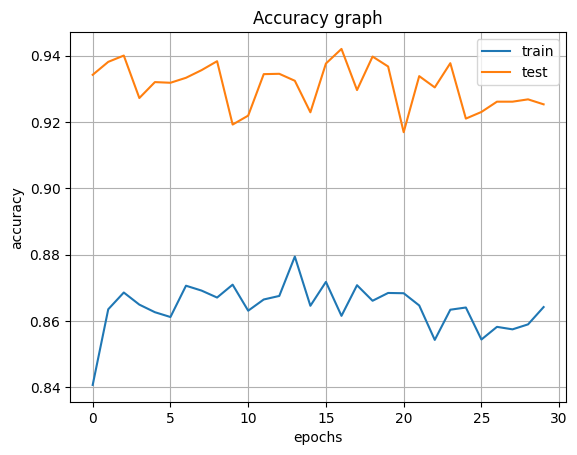

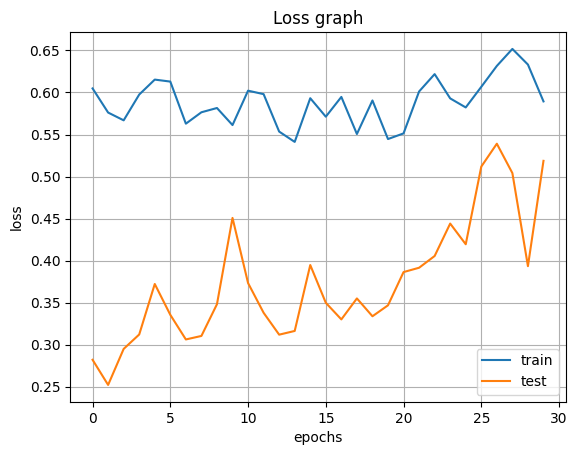

In [8]:
# 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

# 손실 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()